In [1]:
from bs4 import BeautifulSoup
from fake_useragent import UserAgent
import requests
import time
import csv
import matplotlib.pyplot as plt
import numpy as np
from prettytable import PrettyTable
import sqlite3

In [2]:
con = sqlite3.connect('my.db') #создали соединение с БД
cur = con.cursor() #курсор, по строкам будет ходить

def create_table_student():
    cur.execute('CREATE TABLE IF NOT EXISTS student (vk_id INT NOT NULL, name VARCHAR(45) NOT NULL, home_town VARCHAR(45) NOT NULL, PRIMARY KEY (vk_id), CONSTRAINT fk_student_student_sex  FOREIGN KEY (name) REFERENCES student_sex (student_name) ON DELETE NO ACTION ON UPDATE NO ACTION)')

def create_table_student_sex():
    cur.execute('CREATE TABLE IF NOT EXISTS student_sex (student_name VARCHAR(45) NOT NULL, student_sex VARCHAR(45) NULL, PRIMARY KEY (student_name))')    
    

def data_entry(value):    
    cur.execute('INSERT INTO student (vk_id, name, home_town) VALUES(?, ?, ?)',value)
    con.commit()

def data_entry_sex(value):    
    cur.execute('INSERT or IGNORE INTO student_sex (student_name, student_sex) VALUES(?, ?)',value)
    con.commit()

create_table_student()
create_table_student_sex()
    
        
def user_parser (j, id, sex):
    if sex==1:
        sex1='female'
    else:
        sex1='male'  
    url = "https://api.vk.com/method/users.get.xml?user_ids="+id[1:]+"&fields=home_town"
    r = requests.get(url)
    page = BeautifulSoup(r.text, 'html.parser')
    try: #(number, url, id, home_town, name, sex)
        answer = (str(j), id, page.uid.get_text(), page.home_town.get_text(), page.first_name.get_text(), sex1)
    except AttributeError:
        answer = (str(j), id, page.uid.get_text(), 'Error', page.first_name.get_text(), sex1)
    try:
        if answer[3]!='Error':
            if answer[3]!='':
                data_entry((answer[2],answer[4],answer[3]))
                data_entry_sex((answer[4],answer[5]))
    except UnicodeEncodeError:
        answer = (str(j), id, page.uid.get_text(), 'Error', page.first_name.get_text(), sex1)
        if answer[3]!='Error':
            if answer[3]!='':
                data_entry((answer[2],answer[4],answer[3]))
                data_entry_sex((answer[4],answer[5]))
    time.sleep(0.33)

In [3]:
ua = UserAgent()
print(ua.chrome)
header = {'User-Agent':str(ua.chrome)}
print(header)

Mozilla/5.0 (Windows NT 6.2; WOW64) AppleWebKit/537.15 (KHTML, like Gecko) Chrome/24.0.1295.0 Safari/537.15
{'User-Agent': 'Mozilla/5.0 (X11; CrOS i686 4319.74.0) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/29.0.1547.57 Safari/537.36'}


In [4]:
j=0
bdate=17

while bdate<=25:
    sex=1
    while sex<=2:
        i=1
        while i<=1:
            if i==0:
                url = "https://vk.com/search?c%5Bage_from%5D="+str(bdate)+"&c%5Bage_to%5D="+str(bdate)+"&c%5Bcity%5D=2&c%5Bcountry%5D=1&c%5Bname%5D=1&c%5Bper_page%5D=40&c%5Bphoto%5D=1&c%5Bsection%5D=people&c%5Bsex%5D="+str(sex)+"&c%5Buniversity%5D=56&offset=0"
            else:
                url = "https://vk.com/search?c%5Bage_from%5D="+str(bdate)+"&c%5Bage_to%5D="+str(bdate)+"&c%5Bcity%5D=2&c%5Bcountry%5D=1&c%5Bname%5D=1&c%5Bper_page%5D=40&c%5Bphoto%5D=1&c%5Bsection%5D=people&c%5Bsex%5D="+str(sex)+"&c%5Buniversity%5D=56&offset="+str(20+i*20)
            r=requests.get(url, headers=header)
            print(r.ok)
            page = BeautifulSoup(r.text, 'html.parser')
            #print(page.prettify())
            tags=page.findAll("div", {"class":"labeled name"})
            #print (tags)
            print('Page', i+1)
            for tag in tags:
                some=tag.findAll("a", {"class": None})
                for link in some:
                    j=j+1
                    print (j,')' ,link.get('href'))
                    user_parser(j, link.get('href'), sex)
            i=i+1
            time.sleep(0.33)
        sex=sex+1
    bdate=bdate+1

True
Page 2
1 ) /id25676529
2 ) /snezzzhana
3 ) /nastya_stausy
4 ) /losseella
5 ) /belyakovamaria
6 ) /feykina
7 ) /lakmanito21
8 ) /id351690564
9 ) /id255127441
10 ) /j_uli
11 ) /katerina.vasilyeva99
True
Page 2
12 ) /kryakrya228
13 ) /danchik728
14 ) /aleks886
15 ) /nikitaoriginal
16 ) /ezolotaryov2013
17 ) /id212950644
18 ) /hellishdemoman
19 ) /alfaoscar_21
20 ) /vladmardus
21 ) /teptopek
22 ) /lesha1201
23 ) /victormikhaylov
24 ) /trappistoneb
25 ) /dinwinchester
True
Page 2
26 ) /id144504433
27 ) /elvira_29
28 ) /daria_kaverzina
29 ) /id134233495
30 ) /ridso
31 ) /margaretmargaret1
32 ) /id90437308
33 ) /kivikik
34 ) /all___al
35 ) /id79517509
36 ) /katyamnbv
37 ) /id70503750
38 ) /darya904
39 ) /id58194687
40 ) /elizabethmiu
True
Page 2
41 ) /alexandr_luchko
42 ) /peterkornush
43 ) /semenx10
44 ) /phi1618
45 ) /gnatunstyles
46 ) /id257193790
47 ) /dreyger87
48 ) /ilya0leitto
49 ) /id197935847
50 ) /therealsova
51 ) /dkirpikov
52 ) /id137824675
True
Page 2
53 ) /hel_0987888
54 ) 

In [3]:
cur.execute('UPDATE student SET home_town = "Санкт-Петербург" WHERE home_town = "Санкт - Петербург" OR home_town = "Санкт Петербург" OR home_town = "СПб" OR home_town = "Питер" OR home_town = "Saint-Petersburg" OR home_town = "Петербург" OR home_town = "Санкт-петербург" OR home_town = "Санкт- Петербург" OR home_town = "Санкт-Петербург " OR home_town = "санкт-петербург"  OR home_town = "спб" OR home_town = "СПБ"')
con.commit()

In [4]:
cur.execute('SELECT COUNT(1) FROM student')
str_vsego = cur.fetchall()
vsego = str_vsego.pop(0)[0]
print('Число анализируемых пользователей =',vsego)

###получили списки для осей

cur.execute('SELECT home_town, COUNT(home_town) FROM student GROUP BY home_town ORDER BY COUNT(home_town) DESC')
data_town = cur.fetchall()
cur.execute('SELECT home_town, COUNT(home_town) FROM student GROUP BY home_town ORDER BY COUNT(home_town) DESC')
data_value = cur.fetchall()
cur.execute('SELECT home_town, COUNT(home_town) FROM student GROUP BY home_town ORDER BY COUNT(home_town) DESC')
data_num = cur.fetchall()
towns = []
values = []
num_people = []
values_percent=[]
b = 0
while b<len(data_town):
    towns.append(data_town.pop(b)[0])
    num_people.append(data_num.pop(b)[1])
    values.append(data_value.pop(b)[1])
    values_percent.append(round(values.pop(b)*100/vsego, 2))
    
th=['N' ,'Город','Число студентов, чел','В процентном соотношении, %']
table = PrettyTable(th)
for i in range(25):
    i=i+1
    table.add_row([i ,towns[i-1], num_people[i-1], values_percent[i-1]])
print(table)

Число анализируемых пользователей = 3056
+----+------------------+----------------------+-----------------------------+
| N  |      Город       | Число студентов, чел | В процентном соотношении, % |
+----+------------------+----------------------+-----------------------------+
| 1  | Санкт-Петербург  |         1256         |             41.1            |
| 2  |     Норильск     |          22          |             0.72            |
| 3  |     Мурманск     |          21          |             0.69            |
| 4  |       Уфа        |          19          |             0.62            |
| 5  |   Екатеринбург   |          18          |             0.59            |
| 6  |    Челябинск     |          18          |             0.59            |
| 7  |   Северодвинск   |          17          |             0.56            |
| 8  |      Сургут      |          15          |             0.49            |
| 9  |    Череповец     |          15          |             0.49            |
| 10 |   Ар

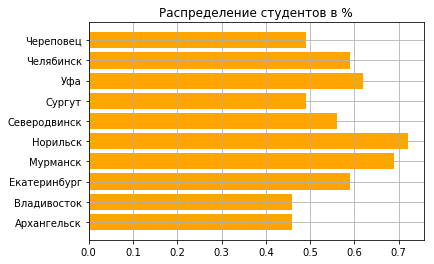

In [7]:
#построение гистаграммы для перых 10 городов, за исключением Санкт-Петербурга (Для наглядности, т.к. в логарифмическом масштабе не удается построить) 
fig = plt.figure()
axes = fig.add_subplot (1, 1, 1)
plt.barh(towns[1:11], values_percent[1:11], align='center', color='orange')
axes.set_xscale ('linear')
plt.title('Распределение студентов в %')
plt.grid(True)   # линии вспомогательной сетки
plt.show()